In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import GradientBoostingClassifier
from string import punctuation

In [2]:
deliveries = pd.read_csv('C:/Users/Dell/Data science/ipldata/deliveries.csv')
matches = pd.read_csv('C:/Users/Dell/Data science/ipldata/matches.csv')

In [56]:
CSK = ['MS Dhoni', 'KM Asif', 'SW Billings', 'C Bishnoi', 'DJ Bravo', 'DL Chahar', 'F du Plessis', 'RD Gaikwad', 
       'Harbhajan Singh', 'Imran Tahir', 'RA Jadeja', 'KM Jadhav', 'N Jagadeesan', 'Monu Kumar', 'L Ngidi', 'SK Raina', 
       'AT Rayudu', 'MJ Santner', 'KV Sharma', 'MM Sharma', 'DR Shorey', 'SN Thakur', 'M Vijay', 'SR Watson', 'DJ Willey']

RCB = ['V Kohli', 'AD Nath', 'MM Ali', 'YS Chahal', 'NM Coulter-Nile', 'C de Grandhomme', 'AB de Villiers', 'S Dube', 
       'Gurkeerat Singh', 'SO Hetmyer', 'Himmat Singh', 'K Khejroliya', 'H Klaasen', 'Milind Kumar', 'Mohammed Siraj', 
       'P Negi', 'D Padikkal', 'PA Patel', 'P Ray Barman', 'NA Saini', 'TG Southee', 'MP Stoinis', 'Washington Sundar', 
       'UT Yadav']

# CSK = ['SR Watson','SK Raina','AT Rayudu','MS Dhoni', 'KM Jadhav','DJ Bravo','RA Jadeja','DL Chahar',
#       'Harbhajan Singh', 'Imran Tahir','SN Thakur']

# RCB = ['PA Patel','MM Ali','V Kohli','AB de Villiers','SO Hetmyer', 'S Dube','C de Grandhomme','NA Saini','UT Yadav',
#       'Mohammed Siraj','YS Chahal']

# KKR = ['KD Karthik', 'CR Brathwaite', 'PP Chawla', 'JL Denly', 'LH Ferguson', 'HF Gurney', 'Kuldeep Yadav', 'CA Lynn', 
#        'SS Mundhe', 'KL Nagarkoti', 'NS Naik', 'SP Narine', 'A Nortje', 'M Prasidh Krishna', 'Y Prithvi Raj', 'N Rana', 
#        'AD Russell', 'Shivam Mavi', 'Shubman Gill', 'RK Singh', 'RV Uthappa']

# SRH = ['DA Warner', 'Abhishek Sharma', 'KK Ahmed', 'JM Bairstow', 'Basil Thampi', 'RK Bhui', 'SP Goswami', 'MJ Guptill', 
#        'DJ Hooda', 'S Kaul', 'B Kumar', 'Mohammad Nabi', 'S Nadeem', 'T Natarajan', 'MK Pandey', 'YK Pathan', 'Rashid Khan', 
#        'WP Saha', 'Sandeep Sharma', 'V Shankar', 'Shakib Al Hasan', 'B Stanlake', 'KS Williamson']

KKR = ['KD Karthik', 'PP Chawla', 'LH Ferguson', 'Kuldeep Yadav', 'CA Lynn', 'SP Narine', 'M Prasidh Krishna','N Rana','AD Russell', 'Shubman Gill' ,'RV Uthappa']

SRH = ['DA Warner', 'JM Bairstow','MK Pandey','DJ Hooda','Shakib Al Hasan','V Shankar','YK Pathan','S Kaul', 'B Kumar', 'Rashid Khan','Sandeep Sharma']

MI = ['RG Sharma', 'Anmolpreet Singh', 'JP Behrendorff', 'JJ Bumrah', 'RD Chahar', 'BCJ Cutting', 'Q de Kock', 'Ishan Kishan', 
      'PP Jaiswal', 'SD Lad', 'E Lewis', 'MJ McClenaghan', 'SL Malinga', 'M Markande', 'AF Milne', 'HH Pandya', 'KH Pandya', 
      'KA Pollard', 'Rasikh Salam', 'AS Roy', 'BB Sran', 'AP Tare', 'SA Yadav', 'Yuvraj Singh']

DC = ['Avesh Khan', 'B Ayyappa', 'AK Bains', 'TA Boult', 'S Dhawan', 'CA Ingram', 'SS Iyer', 'S Lamichhane', 'Manjot Kalra', 
      'A Mishra', 'CH Morris', 'C Munro', 'RR Pant', 'AR Patel', 'HV Patel', 'KMA Paul', 'K Rabada', 'SE Rutherford', 
      'Jalaj S Saxena', 'I Sharma', 'PP Shaw', 'NB Singh', 'R Tewatia', 'GH Vihari', 'J Yadav']

RR = ['SPD Smith', 'VR Aaron', 'JC Archer', 'STR Binny', 'AV Birla', 'JC Buttler', 'P Chopra', 'S Gopal', 'K Gowtham', 
      'DS Kulkarni', 'LS Livingstone', 'MK Lomror', 'S Midhun', 'R Parag', 'AM Rahane', 'SS Ranjane', 'SV Samson', 
      'Shashank Singh', 'IS Sodhi', 'BA Stokes', 'O Thomas', 'RA Tripathi', 'AJ Turner', 'JD Unadkat', 'M Vohra']

KXIP = ['MA Agarwal', 'Arshdeep Singh', 'M Ashwin', 'R Ashwin', 'AC Ayachi', 'SM Curran', 'CH Gayle', 'Harpreet Brar', 
        'MC Henriques', 'SN Khan', 'Mandeep Singh', 'DA Miller', 'Mohammed Shami', 'Mujeeb Ur Rahman', 'KK Nair', 
        'DG Nalkande', 'N Pooran', 'KL Rahul', 'AS Rajpoot', 'P Simran Singh', 'AJ Tye', 'CV Varun', 'GC Viljoen']

In [4]:
def replace(x) :
    return ''.join([i for i in x if i not in punctuation])

In [5]:
matches['venue'] = matches['venue'].apply(replace)
matches['venue'] = matches['venue'].apply(lambda x: x.replace('Punjab Cricket Association IS Bindra Stadium Mohali','Punjab Cricket Association Stadium Mohali'))
venues= list(matches.venue.value_counts().index)
venues

['M Chinnaswamy Stadium',
 'Eden Gardens',
 'Feroz Shah Kotla',
 'Wankhede Stadium',
 'Rajiv Gandhi International Stadium Uppal',
 'Punjab Cricket Association Stadium Mohali',
 'MA Chidambaram Stadium Chepauk',
 'Sawai Mansingh Stadium',
 'Maharashtra Cricket Association Stadium',
 'Dr DY Patil Sports Academy',
 'Subrata Roy Sahara Stadium',
 'Kingsmead',
 'Sardar Patel Stadium Motera',
 'SuperSport Park',
 'Brabourne Stadium',
 'Dr YS Rajasekhara Reddy ACAVDCA Cricket Stadium',
 'Saurashtra Cricket Association Stadium',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'New Wanderers Stadium',
 'Dubai International Cricket Stadium',
 'St Georges Park',
 'Sheikh Zayed Stadium',
 'JSCA International Stadium Complex',
 'Newlands',
 'Barabati Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Nehru Stadium',
 'Green Park',
 'Buffalo Park',
 'Vidarbha Cricket Association Stadium Jamtha',
 'De Beers Diamond Oval',
 'OUTsur

In [6]:
def balls(cols) :
    x = cols[0]
    y = cols[1]
    if x > 0 or y > 0 :
        return 0
    else :
        return 1
def out_bowler(x) :
    if x in ('caught','bowled','lbw','stumped','caught and bowled','hit wicket') :
        return 1
    else :
        return 0
def team(x) :
    if x in CSK :
        return 'CSK'
    elif x in RCB :
        return 'RCB'
    elif x in KKR :
        return 'KKR'
    elif x in SRH :
        return 'SRH'
    elif x in MI :
        return 'MI'
    elif x in DC :
        return 'DC'
    elif x in RR :
        return 'RR'
    elif x in KXIP :
        return 'KXIP'
    else :
        return 'None'
    
def is_played_5_15(cols):
    x = cols
    if x > 5 and x <= 15:
        return 1
    else :
        return 0
def is_played_15_25(cols):
    x = cols
    if x > 15 and x <= 25:
        return 1
    else :
        return 0
def is_played_25(cols):
    x = cols
    if x > 25:
        return 1
    else :
        return 0
    
def is_played_bowl_1(x) :
    if x== 1 :
        return 1
    else :
        return 0
def is_played_bowl_2(x) :
    if x== 2 :
        return 1
    else :
        return 0
def is_played_bowl_3(x) :
    if x >= 3 :
        return 1
    else :
        return 0
    
def fillna(cols) :
    x1 = cols[0]
    x2 = cols[1]
    x3 = cols[2]
    return (x1+x2+x3)/3

def fillna2(cols) :
    x1 = cols[0]
    x2 = cols[1]
    return (x1+x2)/2

In [7]:
total_df = pd.merge(left=deliveries,right=matches,left_on='match_id',right_on='id')
total_df['balls'] = total_df[['wide_runs','noball_runs']].apply(balls,axis=1)
total_df['out_bowler'] = total_df['dismissal_kind'].apply(out_bowler)
total_df.drop(labels=['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','id','player_dismissed','dismissal_kind','extra_runs','total_runs'],axis=1,inplace=True)
total_df['batsman_team'] = total_df['batsman'].apply(team)
total_df['bowler_team'] = total_df['bowler'].apply(team)
total_df = total_df.groupby(by=['match_id','batsman','bowler','venue','batsman_team','bowler_team'],as_index=False).sum()[['match_id','batsman','bowler','batsman_runs','venue','balls','out_bowler','batsman_team','bowler_team']]
total_df = total_df[(total_df['batsman_team']!='None') & (total_df['bowler_team']!='None') & (total_df['bowler_team']!= total_df['batsman_team'])]
batting_score = total_df.groupby(by=['match_id','batsman','batsman_team','bowler_team','venue'],as_index=False).sum()[['match_id','batsman','batsman_team','bowler_team','venue','batsman_runs','out_bowler']]
bowling_score = total_df.groupby(by=['match_id','bowler','batsman_team','bowler_team','venue'],as_index=False).sum()[['match_id','bowler','batsman_team','bowler_team','venue','batsman_runs','out_bowler']]

In [8]:
batting_score.head()

,match_id,batsman,batsman_team,bowler_team,venue,batsman_runs,out_bowler
0,1,BCJ Cutting,MI,CSK,Rajiv Gandhi International Stadium Uppal,15,0
1,1,CH Gayle,KXIP,MI,Rajiv Gandhi International Stadium Uppal,4,0
2,1,CH Gayle,KXIP,SRH,Rajiv Gandhi International Stadium Uppal,16,1
3,1,DJ Hooda,SRH,CSK,Rajiv Gandhi International Stadium Uppal,1,0
4,1,DJ Hooda,SRH,RCB,Rajiv Gandhi International Stadium Uppal,2,0


In [9]:
bowling_score.head()

,match_id,bowler,batsman_team,bowler_team,venue,batsman_runs,out_bowler
0,1,B Kumar,CSK,SRH,Rajiv Gandhi International Stadium Uppal,2,0
1,1,B Kumar,KXIP,SRH,Rajiv Gandhi International Stadium Uppal,15,0
2,1,B Kumar,RCB,SRH,Rajiv Gandhi International Stadium Uppal,2,0
3,1,B Kumar,RR,SRH,Rajiv Gandhi International Stadium Uppal,1,1
4,1,BCJ Cutting,CSK,MI,Rajiv Gandhi International Stadium Uppal,13,0


In [10]:
teams = ['CSK','RCB','KKR','SRH','MI','DC','RR','KXIP']

In [11]:
def handling_features(a) :
    if len(a) == 3 :
        return a
    elif len(a) == 2 :
        a = np.append(a,np.NaN)
        return a
    elif len(a) == 1 :
        a = np.append(a,np.NaN)
        a = np.append(a,np.NaN)
        return a

In [12]:
def fill_method(bat5) :
    
    bat5['pre2'].fillna(value=bat5['pre1'],inplace=True)
    bat5['pre3'].fillna(value=bat5[['pre1','pre2']].apply(fillna2,axis=1),inplace=True)
    
    bat5['pre_opp1'].fillna(value=bat5[['pre1','pre2','pre3']].apply(fillna,axis=1),inplace=True)
    bat5['pre_opp2'].fillna(value=bat5['pre_opp1'],inplace=True)
    bat5['pre_opp3'].fillna(value=bat5[['pre_opp1','pre_opp2']].apply(fillna2,axis=1),inplace=True)

    bat5['pre_venue1'].fillna(value=bat5[['pre1','pre2','pre3']].apply(fillna,axis=1),inplace=True)
    bat5['pre_venue2'].fillna(value=bat5['pre_venue1'],inplace=True)
    bat5['pre_venue3'].fillna(value=bat5[['pre_venue1','pre_venue2']].apply(fillna2,axis=1),inplace=True)
    
    bat5['bowl_pre2'].fillna(value=bat5['bowl_pre1'],inplace=True)
    bat5['bowl_pre3'].fillna(value=bat5[['bowl_pre1','bowl_pre2']].apply(fillna2,axis=1),inplace=True)

    bat5['bowl_opp1'].fillna(value=bat5[['bowl_pre1','bowl_pre2','bowl_pre3']].apply(fillna,axis=1),inplace=True)
    bat5['bowl_opp2'].fillna(value=bat5['bowl_opp1'],inplace=True)
    bat5['bowl_opp3'].fillna(value=bat5[['bowl_opp1','bowl_opp2']].apply(fillna2,axis=1),inplace=True)

    bat5['venue_opp1'].fillna(value=bat5[['bowl_pre1','bowl_pre2','bowl_pre3']].apply(fillna,axis=1),inplace=True)
    bat5['venue_opp2'].fillna(value=bat5['venue_opp1'],inplace=True)
    bat5['venue_opp3'].fillna(value=bat5[['venue_opp1','venue_opp2']].apply(fillna2,axis=1),inplace=True)

In [13]:
def prediction(bat_dummies,out_col,batting_score,player,batsman_team,bowler_team,match_venue,teams,venues) :  
    X = bat_dummies.iloc[:,2:-3]
    y = bat_dummies.iloc[:,out_col]

    X_train = bat_dummies.iloc[:-5,2:-3]
    y_train = bat_dummies.iloc[:-5,out_col]

    X_test = bat_dummies.iloc[-5:,2:-3]
    y_test = bat_dummies.iloc[-5:,out_col]

    X_val = np.zeros(X_train.shape[1])
    a1 = batting_score[(batting_score['batsman']==player)].sort_values(by='match_id').tail(3)['batsman_runs'].values
    X_val[0:3] = handling_features(a1)

    a2 = batting_score[(batting_score['batsman']==player) & 
                               (batting_score['bowler_team']==bowler_team)].sort_values(by='match_id').tail(3)[['batsman_runs','out_bowler']]
    a2['avg'] = a2['batsman_runs'] / a2['out_bowler'].apply(lambda x: 1 if x==0 else x)
    X_val[3:6] = handling_features(a2['avg'].values)
    a3 = batting_score[(batting_score['batsman']==player) & 
                               (batting_score['venue']==match_venue)].sort_values(by='match_id').tail(3)[['batsman_runs','out_bowler']]
    a3['avg'] = a3['batsman_runs'] / a3['out_bowler'].apply(lambda x: 1 if x==0 else x)
    X_val[6:9] = handling_features(a3['avg'].values)
    b1 = batting_score[(batting_score['bowler_team']==bowler_team)].groupby(by=['match_id','bowler_team','venue'],as_index=False).sum()[['match_id','bowler_team','venue','batsman_runs','out_bowler']].sort_values(by='match_id').tail(3)[['batsman_runs','out_bowler']]
    b1['avg'] = b1['batsman_runs'] / b1['out_bowler'].apply(lambda x: 1 if x==0 else x)
    X_val[9:12] = handling_features(b1['avg'].values)

    b2 = batting_score[(batting_score['batsman_team']==batsman_team) & (batting_score['bowler_team']==bowler_team)].groupby(by=['match_id','bowler_team','venue'],as_index=False).sum()[['match_id','bowler_team','venue','batsman_runs','out_bowler']].sort_values(by='match_id').tail(3)[['batsman_runs','out_bowler']]
    b2['avg'] = b2['batsman_runs'] / b2['out_bowler'].apply(lambda x: 1 if x==0 else x)
    X_val[12:15] = handling_features(b2['avg'].values)

    b3 = batting_score[(batting_score['bowler_team']==bowler_team) & (batting_score['venue']==match_venue)].groupby(by=['match_id','bowler_team','venue'],as_index=False).sum()[['match_id','bowler_team','venue','batsman_runs','out_bowler']].sort_values(by='match_id').tail(3)[['batsman_runs','out_bowler']]
    b3['avg'] = b3['batsman_runs'] / b3['out_bowler'].apply(lambda x: 1 if x==0 else x)
    X_val[15:18] = handling_features(b3['avg'].values)

    opposition = 'bowler_team_'+ bowler_team
    for i in range(0,len(X_train.columns)) :
        if opposition in X_train.columns[i] :
            opp_index = i
            X_val[opp_index] = 1

    match_venue = 'venue_'+ match_venue
    for i in range(0,len(X_train.columns)) :
        if match_venue in X_train.columns[i] :
            venue_index = i
            X_val[venue_index] = 1

    X_val = pd.DataFrame(X_val.reshape(1,-1),columns=X_train.columns)
    fill_method(X_val)
    d = []
    if (y_train.value_counts().count()) > 1 :
        cls = GradientBoostingClassifier(n_estimators=int(X_train.shape[0]/3),random_state=0)
        cls.fit(X_train,y_train)
        d.append(cls.score(X_test,y_test))
        cls = GradientBoostingClassifier(n_estimators=int(X.shape[0]/3),random_state=0)
        cls.fit(X,y)
        d.append(cls.predict_proba(X_val)[:,1][0])
        return d

In [26]:
def batting_per(batting_score,player,batsman_team,bowler_team,match_venue,teams,venues,bat_prob) :
    df = batting_score[batting_score['batsman']==player]
    df = df.sort_values(by='match_id')
    df['pre1'] = df['batsman_runs'].shift(1)
    df['pre2'] = df['batsman_runs'].shift(2)
    df['pre3'] = df['batsman_runs'].shift(3)
    df.drop(df[df['pre1'].isnull()].index.values,inplace=True)
    
    opp_df = pd.DataFrame()
    for i in [i for i in teams if i not in batsman_team] :
        opp = batting_score[(batting_score['batsman']==player) & (batting_score['bowler_team']==i)]
        opp = opp.sort_values(by='match_id')
        opp['avg'] = opp['batsman_runs'] / opp['out_bowler'].apply(lambda x: 1 if x==0 else x)
        opp['pre_opp1'] = opp['avg'].shift(1)
        opp['pre_opp2'] = opp['avg'].shift(2)
        opp['pre_opp3'] = opp['avg'].shift(3)
        opp_df = opp_df.append(opp)
    opp_df = opp_df[['match_id','batsman','bowler_team','venue','pre_opp1','pre_opp2','pre_opp3']]
    bat1 = pd.merge(df,opp_df,left_on=['match_id','batsman','bowler_team','venue'],right_on=['match_id','batsman','bowler_team','venue'],how='left')
    
    venue_df = pd.DataFrame()
    for j in venues :
        ven = batting_score[(batting_score['batsman']==player) & (batting_score['venue']==j)]
        ven = ven.sort_values(by='match_id')
        ven['avg'] = ven['batsman_runs'] / ven['out_bowler'].apply(lambda x: 1 if x==0 else x)
        ven['pre_venue1'] = ven['avg'].shift(1)
        ven['pre_venue2'] = ven['avg'].shift(2)
        ven['pre_venue3'] = ven['avg'].shift(3)
        venue_df = venue_df.append(ven)
    venue_df = venue_df[['match_id','batsman','bowler_team','venue','pre_venue1','pre_venue2','pre_venue3']]
    bat2 = pd.merge(bat1,venue_df,left_on=['match_id','batsman','bowler_team','venue'],right_on=['match_id','batsman','bowler_team','venue'],how='left')

    
    bowl_df = pd.DataFrame()
    for k in [i for i in teams if i not in batsman_team] :
        bowl = batting_score[(batting_score['bowler_team']==k)].groupby(by=['match_id','bowler_team','venue'],as_index=False).sum()[['match_id','bowler_team','venue','batsman_runs','out_bowler']]
        bowl = bowl.sort_values(by='match_id')
        bowl['avg'] = bowl['batsman_runs'] / bowl['out_bowler'].apply(lambda x: 1 if x==0 else x)
        bowl['bowl_pre1'] = bowl['avg'].shift(1)
        bowl['bowl_pre2'] = bowl['avg'].shift(2)
        bowl['bowl_pre3'] = bowl['avg'].shift(3)
        bowl_df = bowl_df.append(bowl)
    bowl_df.drop(bowl_df[bowl_df['bowl_pre1'].isnull()].index.values,inplace=True)
    bat3 = pd.merge(bat2,bowl_df,left_on=['match_id','bowler_team','venue'],right_on=['match_id','bowler_team','venue'],how='left')
    bat3 = bat3[['match_id', 'batsman', 'batsman_team', 'bowler_team', 'venue','batsman_runs_x', 'out_bowler_x', 'pre1', 'pre2', 'pre3', 'pre_opp1',
           'pre_opp2', 'pre_opp3', 'pre_venue1', 'pre_venue2', 'pre_venue3','bowl_pre1', 'bowl_pre2', 'bowl_pre3']]
    
    bowl_opp_df = pd.DataFrame()
    for l in [i for i in teams if i not in batsman_team] :
        bowl_opp = batting_score[(batting_score['batsman_team']==batsman_team) & (batting_score['bowler_team']==l)].groupby(by=['match_id','bowler_team','venue'],as_index=False).sum()[['match_id','bowler_team','venue','batsman_runs','out_bowler']]
        bowl_opp = bowl_opp.sort_values(by='match_id')
        bowl_opp['avg'] = bowl_opp['batsman_runs'] / bowl_opp['out_bowler'].apply(lambda x: 1 if x==0 else x)
        bowl_opp['bowl_opp1'] = bowl_opp['avg'].shift(1)
        bowl_opp['bowl_opp2'] = bowl_opp['avg'].shift(2)
        bowl_opp['bowl_opp3'] = bowl_opp['avg'].shift(3)
        bowl_opp_df = bowl_opp_df.append(bowl_opp)
    bat4 = pd.merge(bat3,bowl_opp_df,left_on=['match_id','bowler_team','venue'],right_on=['match_id','bowler_team','venue'],how='left')
    bat4 = bat4[['match_id', 'batsman', 'batsman_team', 'bowler_team', 'venue','batsman_runs_x', 'out_bowler_x', 'pre1', 'pre2', 'pre3', 'pre_opp1',
           'pre_opp2', 'pre_opp3', 'pre_venue1', 'pre_venue2', 'pre_venue3','bowl_pre1', 'bowl_pre2', 'bowl_pre3','bowl_opp1','bowl_opp2','bowl_opp3']]
              
    bowl_venue_df = pd.DataFrame()
    for m in [i for i in teams if i not in batsman_team] :
        for n in venues :
            bowl_venue = batting_score[(batting_score['bowler_team']==m) & (batting_score['venue']==n)].groupby(by=['match_id','bowler_team','venue'],as_index=False).sum()[['match_id','bowler_team','venue','batsman_runs','out_bowler']]
            bowl_venue = bowl_venue.sort_values(by='match_id')
            bowl_venue['avg'] = bowl_venue['batsman_runs'] / bowl_venue['out_bowler'].apply(lambda x: 1 if x==0 else x)
            bowl_venue['venue_opp1'] = bowl_venue['avg'].shift(1)
            bowl_venue['venue_opp2'] = bowl_venue['avg'].shift(2)
            bowl_venue['venue_opp3'] = bowl_venue['avg'].shift(3)
            bowl_venue_df = bowl_venue_df.append(bowl_venue)
    bat5 = pd.merge(bat4,bowl_venue_df,left_on=['match_id','bowler_team','venue'],right_on=['match_id','bowler_team','venue'],how='left')
    bat5 = bat5[['bowler_team', 'venue','batsman_runs_x', 'out_bowler_x', 
                 'pre1', 'pre2', 'pre3', 'pre_opp1','pre_opp2', 'pre_opp3', 'pre_venue1', 'pre_venue2', 
                 'pre_venue3','bowl_pre1', 'bowl_pre2', 'bowl_pre3','bowl_opp1', 'bowl_opp2','bowl_opp3',
                 'venue_opp1','venue_opp2', 'venue_opp3']]
    
    fill_method(bat5)
    
    bat_dummies = pd.get_dummies(bat5,columns=['bowler_team','venue'])
    bat_dummies.dropna(inplace=True)
    if bat_dummies.shape[0] >= 15 :
        bat_dummies['is_played_5_15']=bat_dummies['batsman_runs_x'].apply(is_played_5_15)
        bat_dummies['is_played_15_25']=bat_dummies['batsman_runs_x'].apply(is_played_15_25)
        bat_dummies['is_played_25']=bat_dummies['batsman_runs_x'].apply(is_played_25)
        bat_prob_dummy = {}
        bat_prob_dummy['is_played_5_15']=prediction(bat_dummies,-3,batting_score,player,batsman_team,bowler_team,match_venue,teams,venues)
        bat_prob_dummy['is_played_15_25']=prediction(bat_dummies,-2,batting_score,player,batsman_team,bowler_team,match_venue,teams,venues)
        bat_prob_dummy['is_played_25']=prediction(bat_dummies,-1,batting_score,player,batsman_team,bowler_team,match_venue,teams,venues)      
        bat_prob[player] = bat_prob_dummy

def performance_batting(batting_score,own,opp,own_text,opp_text,venue,teams,venues) :
    bat_prob = {}
    for i in own :
        batting_per(batting_score,i,own_text,opp_text,venue,teams,venues,bat_prob)
    for j in opp :
        batting_per(batting_score,j,opp_text,own_text,venue,teams,venues,bat_prob)
    bat_plot = pd.DataFrame.from_dict(bat_prob,orient='index')
    bat_plot['conf_5_15'] = bat_plot['is_played_5_15'].apply(lambda x: x[0] if x is not None else 0)
    bat_plot['prob_5_15'] = bat_plot['is_played_5_15'].apply(lambda x: x[1] if x is not None else 0)
    bat_plot['conf_15_25'] = bat_plot['is_played_15_25'].apply(lambda x: x[0] if x is not None else 0)
    bat_plot['prob_15_25'] = bat_plot['is_played_15_25'].apply(lambda x: x[1] if x is not None else 0)
    bat_plot['conf_25'] = bat_plot['is_played_25'].apply(lambda x: x[0] if x is not None else 0)
    bat_plot['prob_25'] = bat_plot['is_played_25'].apply(lambda x: x[1] if x is not None else 0)
    return bat_plot

In [15]:
def prediction_bowl(bat_dummies,out_col,bowling_score,player,batsman_team,bowler_team,match_venue,teams,venues) :
    X = bat_dummies.iloc[:,2:-3]
    y = bat_dummies.iloc[:,out_col]

    X_train = bat_dummies.iloc[:-5,2:-3]
    y_train = bat_dummies.iloc[:-5,out_col]

    X_test = bat_dummies.iloc[-5:,2:-3]
    y_test = bat_dummies.iloc[-5:,out_col]

    X_val = np.zeros(X_train.shape[1])
    a1 = bowling_score[(bowling_score['bowler']==player)].sort_values(by='match_id').tail(3)['out_bowler'].values
    X_val[0:3] = handling_features(a1)

    a2 = bowling_score[(bowling_score['bowler']==player) & 
                               (bowling_score['batsman_team']==batsman_team)].sort_values(by='match_id').tail(3)[['batsman_runs','out_bowler']]
    a2['avg'] = a2['batsman_runs'] / a2['out_bowler'].apply(lambda x: 1 if x==0 else x)
    X_val[3:6] = handling_features(a2['avg'].values)
    a3 = bowling_score[(bowling_score['bowler']==player) & 
                               (bowling_score['venue']==match_venue)].sort_values(by='match_id').tail(3)[['batsman_runs','out_bowler']]
    a3['avg'] = a3['batsman_runs'] / a3['out_bowler'].apply(lambda x: 1 if x==0 else x)
    X_val[6:9] = handling_features(a3['avg'].values)
    b1 = bowling_score[(bowling_score['batsman_team']==batsman_team)].groupby(by=['match_id','batsman_team','venue'],as_index=False).sum()[['match_id','batsman_team','venue','batsman_runs','out_bowler']].sort_values(by='match_id').tail(3)[['batsman_runs','out_bowler']]
    b1['avg'] = b1['batsman_runs'] / b1['out_bowler'].apply(lambda x: 1 if x==0 else x)
    X_val[9:12] = handling_features(b1['avg'].values)

    b2 = bowling_score[(bowling_score['bowler_team']==bowler_team) & (bowling_score['batsman_team']==batsman_team)].groupby(by=['match_id','batsman_team','venue'],as_index=False).sum()[['match_id','batsman_team','venue','batsman_runs','out_bowler']].sort_values(by='match_id').tail(3)[['batsman_runs','out_bowler']]
    b2['avg'] = b2['batsman_runs'] / b2['out_bowler'].apply(lambda x: 1 if x==0 else x)
    X_val[12:15] = handling_features(b2['avg'].values)

    b3 = bowling_score[(bowling_score['batsman_team']==batsman_team) & (bowling_score['venue']==match_venue)].groupby(by=['match_id','batsman_team','venue'],as_index=False).sum()[['match_id','batsman_team','venue','batsman_runs','out_bowler']].sort_values(by='match_id').tail(3)[['batsman_runs','out_bowler']]
    b3['avg'] = b3['batsman_runs'] / b3['out_bowler'].apply(lambda x: 1 if x==0 else x)
    X_val[15:18] = handling_features(b3['avg'].values)

    opposition = 'batsman_team_'+ batsman_team
    for i in range(0,len(X_train.columns)) :
        if opposition in X_train.columns[i] :
            opp_index = i
            X_val[opp_index] = 1

    match_venue = 'venue_'+ match_venue
    for i in range(0,len(X_train.columns)) :
        if match_venue in X_train.columns[i] :
            venue_index = i
            X_val[venue_index] = 1

    X_val = pd.DataFrame(X_val.reshape(1,-1),columns=X_train.columns)
    fill_method(X_val)
    d = []
    if (y_train.value_counts().count()) > 1 :
        cls = GradientBoostingClassifier(n_estimators=int(X_train.shape[0]/3),random_state=0)
        cls.fit(X_train,y_train)
        d.append(cls.score(X_test,y_test))
        cls = GradientBoostingClassifier(n_estimators=int(X.shape[0]/3),random_state=0)
        cls.fit(X,y)
        d.append(cls.predict_proba(X_val)[:,1][0])
        return d

In [27]:
def bowling_per(bowling_score,player,batsman_team,bowler_team,match_venue,teams,venues,bowl_prob) :

    #print(player)
    df = bowling_score[bowling_score['bowler']==player]
    df = df.sort_values(by='match_id')
    df['pre1'] = df['out_bowler'].shift(1)
    df['pre2'] = df['out_bowler'].shift(2)
    df['pre3'] = df['out_bowler'].shift(3)
    df.drop(df[df['pre1'].isnull()].index.values,inplace=True)
    #print('df'+str(df.shape))

    opp_df = pd.DataFrame()
    for i in [i for i in teams if i not in bowler_team] :
        opp = bowling_score[(bowling_score['bowler']==player) & (bowling_score['batsman_team']==i)]
        opp = opp.sort_values(by='match_id')
        opp['avg'] = opp['batsman_runs'] / opp['out_bowler'].apply(lambda x: 1 if x==0 else x)
        opp['pre_opp1'] = opp['avg'].shift(1)
        opp['pre_opp2'] = opp['avg'].shift(2)
        opp['pre_opp3'] = opp['avg'].shift(3)
        opp_df = opp_df.append(opp)
    opp_df = opp_df[['match_id','bowler','batsman_team','venue','pre_opp1','pre_opp2','pre_opp3']]
    bat1 = pd.merge(df,opp_df,left_on=['match_id','bowler','batsman_team','venue'],right_on=['match_id','bowler','batsman_team','venue'],how='left')
    #print('bat1'+str(bat1.shape))

    venue_df = pd.DataFrame()
    for j in venues :
        ven = bowling_score[(bowling_score['bowler']==player) & (bowling_score['venue']==j)]
        ven = ven.sort_values(by='match_id')
        ven['avg'] = ven['batsman_runs'] / ven['out_bowler'].apply(lambda x: 1 if x==0 else x)
        ven['pre_venue1'] = ven['avg'].shift(1)
        ven['pre_venue2'] = ven['avg'].shift(2)
        ven['pre_venue3'] = ven['avg'].shift(3)
        venue_df = venue_df.append(ven)
    venue_df = venue_df[['match_id','bowler','batsman_team','venue','pre_venue1','pre_venue2','pre_venue3']]
    bat2 = pd.merge(bat1,venue_df,left_on=['match_id','bowler','batsman_team','venue'],right_on=['match_id','bowler','batsman_team','venue'],how='left')


    bowl_df = pd.DataFrame()
    for k in [i for i in teams if i not in bowler_team] :
        bowl = bowling_score[(bowling_score['batsman_team']==k)].groupby(by=['match_id','batsman_team','venue'],as_index=False).sum()[['match_id','batsman_team','venue','batsman_runs','out_bowler']]
        bowl = bowl.sort_values(by='match_id')
        bowl['avg'] = bowl['batsman_runs'] / bowl['out_bowler'].apply(lambda x: 1 if x==0 else x)
        bowl['bowl_pre1'] = bowl['avg'].shift(1)
        bowl['bowl_pre2'] = bowl['avg'].shift(2)
        bowl['bowl_pre3'] = bowl['avg'].shift(3)
        bowl_df = bowl_df.append(bowl)
    bowl_df.drop(bowl_df[bowl_df['bowl_pre1'].isnull()].index.values,inplace=True)
    bat3 = pd.merge(bat2,bowl_df,left_on=['match_id','batsman_team','venue'],right_on=['match_id','batsman_team','venue'],how='left')
    bat3 = bat3[['match_id', 'bowler', 'bowler_team', 'batsman_team', 'venue','batsman_runs_x', 'out_bowler_x', 'pre1', 'pre2', 'pre3', 'pre_opp1',
           'pre_opp2', 'pre_opp3', 'pre_venue1', 'pre_venue2', 'pre_venue3','bowl_pre1', 'bowl_pre2', 'bowl_pre3']]
    #print('bat3'+str(bat3.shape))

    bowl_opp_df = pd.DataFrame()
    for l in [i for i in teams if i not in bowler_team] :
        bowl_opp = bowling_score[(bowling_score['bowler_team']==bowler_team) & (bowling_score['batsman_team']==l)].groupby(by=['match_id','batsman_team','venue'],as_index=False).sum()[['match_id','batsman_team','venue','batsman_runs','out_bowler']]
        bowl_opp = bowl_opp.sort_values(by='match_id')
        bowl_opp['avg'] = bowl_opp['batsman_runs'] / bowl_opp['out_bowler'].apply(lambda x: 1 if x==0 else x)
        bowl_opp['bowl_opp1'] = bowl_opp['avg'].shift(1)
        bowl_opp['bowl_opp2'] = bowl_opp['avg'].shift(2)
        bowl_opp['bowl_opp3'] = bowl_opp['avg'].shift(3)
        bowl_opp_df = bowl_opp_df.append(bowl_opp)
    bat4 = pd.merge(bat3,bowl_opp_df,left_on=['match_id','batsman_team','venue'],right_on=['match_id','batsman_team','venue'],how='left')
    bat4 = bat4[['match_id', 'bowler', 'bowler_team', 'batsman_team', 'venue','batsman_runs_x', 'out_bowler_x', 'pre1', 'pre2', 'pre3', 'pre_opp1',
           'pre_opp2', 'pre_opp3', 'pre_venue1', 'pre_venue2', 'pre_venue3','bowl_pre1', 'bowl_pre2', 'bowl_pre3','bowl_opp1','bowl_opp2','bowl_opp3']]
    #print('bat4'+str(bat4.shape))

    bowl_venue_df = pd.DataFrame()
    for m in [i for i in teams if i not in bowler_team] :
        for n in venues :
            bowl_venue = bowling_score[(bowling_score['batsman_team']==m) & (bowling_score['venue']==n)].groupby(by=['match_id','batsman_team','venue'],as_index=False).sum()[['match_id','batsman_team','venue','batsman_runs','out_bowler']]
            bowl_venue = bowl_venue.sort_values(by='match_id')
            bowl_venue['avg'] = bowl_venue['batsman_runs'] / bowl_venue['out_bowler'].apply(lambda x: 1 if x==0 else x)
            bowl_venue['venue_opp1'] = bowl_venue['avg'].shift(1)
            bowl_venue['venue_opp2'] = bowl_venue['avg'].shift(2)
            bowl_venue['venue_opp3'] = bowl_venue['avg'].shift(3)
            bowl_venue_df = bowl_venue_df.append(bowl_venue)
    bat5 = pd.merge(bat4,bowl_venue_df,left_on=['match_id','batsman_team','venue'],right_on=['match_id','batsman_team','venue'],how='left')
    bat5 = bat5[['batsman_team', 'venue','batsman_runs_x', 'out_bowler_x', 
                 'pre1', 'pre2', 'pre3', 'pre_opp1','pre_opp2', 'pre_opp3', 'pre_venue1', 'pre_venue2', 
                 'pre_venue3','bowl_pre1', 'bowl_pre2', 'bowl_pre3','bowl_opp1', 'bowl_opp2','bowl_opp3',
                 'venue_opp1','venue_opp2', 'venue_opp3']]

    #print('bat5'+str(bat5.shape))
    fill_method(bat5)

    bat_dummies = pd.get_dummies(bat5,columns=['batsman_team','venue'])
    bat_dummies.dropna(inplace=True)
    if bat_dummies.shape[0] >= 15 :
        bat_dummies['is_played_bowl_1']=bat_dummies['out_bowler_x'].apply(is_played_bowl_1)
        bat_dummies['is_played_bowl_2']=bat_dummies['out_bowler_x'].apply(is_played_bowl_2)
        bat_dummies['is_played_bowl_3']=bat_dummies['out_bowler_x'].apply(is_played_bowl_3)
        bat_prob_dummy = {}
        bat_prob_dummy['is_played_bowl_1']=prediction_bowl(bat_dummies,-3,bowling_score,player,batsman_team,bowler_team,match_venue,teams,venues)
        bat_prob_dummy['is_played_bowl_2']=prediction_bowl(bat_dummies,-2,bowling_score,player,batsman_team,bowler_team,match_venue,teams,venues)
        bat_prob_dummy['is_played_bowl_3']=prediction_bowl(bat_dummies,-1,bowling_score,player,batsman_team,bowler_team,match_venue,teams,venues)      
        bowl_prob[player] = bat_prob_dummy

def performance_bowling(bowling_score,own,opp,own_text,opp_text,venue,teams,venues) :
    bowl_prob = {}
    for i in own :
        bowling_per(bowling_score,i,own_text,opp_text,venue,teams,venues,bowl_prob)
    for j in opp :
        bowling_per(bowling_score,j,opp_text,own_text,venue,teams,venues,bowl_prob)
    bowl_plot = pd.DataFrame.from_dict(bowl_prob,orient='index')
    bowl_plot['conf_1'] = bowl_plot['is_played_bowl_1'].apply(lambda x: x[0] if x is not None else 0)
    bowl_plot['prob_1'] = bowl_plot['is_played_bowl_1'].apply(lambda x: x[1] if x is not None else 0)
    bowl_plot['conf_2'] = bowl_plot['is_played_bowl_2'].apply(lambda x: x[0] if x is not None else 0)
    bowl_plot['prob_2'] = bowl_plot['is_played_bowl_2'].apply(lambda x: x[1] if x is not None else 0)
    bowl_plot['conf_3'] = bowl_plot['is_played_bowl_3'].apply(lambda x: x[0] if x is not None else 0)
    bowl_plot['prob_3'] = bowl_plot['is_played_bowl_3'].apply(lambda x: x[1] if x is not None else 0)
    return bowl_plot

In [69]:
def evalute(own,opp,own_txt,opp_txt,venue) :
    bat_plot = performance_batting(batting_score,own,opp,own_txt,opp_txt,venue,teams,venues)
    bowl_plot = performance_bowling(bowling_score,own,opp,own_txt,opp_txt,venue,teams,venues)
    return bat_plot,bowl_plot
def graph(bat_plot,bowl_plot,threshold,threshold2) :   
    fig, axes = plt.subplots(nrows=2,ncols=3,sharey=True)
    b1= bat_plot[(bat_plot['conf_5_15']>=threshold) & (bat_plot['prob_5_15']>=threshold2)].sort_values(by='prob_5_15',ascending=False)['prob_5_15']
    if b1.shape[0]> 0 :
        b1.plot(kind='bar',ax=axes[0][2],figsize=(12,8),title='Batsman Score: 5 to 15')
        axes[0][2].axhline(y=0.5, color='green', linestyle='--')
        axes[0][2].axhline(y=0.4, color='orange', linestyle='--')
        axes[0][2].axhline(y=0.3, color='red', linestyle='--')
        axes[0][2].axhline(y=0.2, color='blue', linestyle='--')
    b2 = bat_plot[(bat_plot['conf_15_25']>=threshold) & (bat_plot['prob_15_25']>=threshold2)].sort_values(by='prob_15_25',ascending=False)['prob_15_25']
    if b2.shape[0]> 0 :
        b2.plot(kind='bar',ax=axes[0][1],figsize=(12,8),title='Batsman Score: 15 to 25')
        axes[0][1].axhline(y=0.5, color='green', linestyle='--')
        axes[0][1].axhline(y=0.4, color='orange', linestyle='--')
        axes[0][1].axhline(y=0.3, color='red', linestyle='--')
        axes[0][1].axhline(y=0.2, color='blue', linestyle='--')
    b3 = bat_plot[(bat_plot['conf_25']>=threshold)  & (bat_plot['prob_25']>=threshold2)].sort_values(by='prob_25',ascending=False)['prob_25']
    if b3.shape[0]> 0:
        b3.plot(kind='bar',ax=axes[0][0],figsize=(12,8),title='Batsman Score: Above 25')
        axes[0][0].axhline(y=0.5, color='green', linestyle='--')
        axes[0][0].axhline(y=0.4, color='orange', linestyle='--')
        axes[0][0].axhline(y=0.3, color='red', linestyle='--')
        axes[0][0].axhline(y=0.2, color='blue', linestyle='--')
    b4 = bowl_plot[(bowl_plot['conf_1']>=threshold) & (bowl_plot['prob_1']>=threshold2)].sort_values(by='prob_1',ascending=False)['prob_1']
    if b4.shape[0]> 0 :
        b4.plot(kind='bar',ax=axes[1][2],figsize=(12,8),title='Bowler Wickets: 1')
        axes[1][2].axhline(y=0.5, color='green', linestyle='--')
        axes[1][2].axhline(y=0.4, color='orange', linestyle='--')
        axes[1][2].axhline(y=0.3, color='red', linestyle='--')
        axes[1][2].axhline(y=0.2, color='blue', linestyle='--')
    b5 = bowl_plot[(bowl_plot['conf_2']>=threshold) & (bowl_plot['prob_2']>=threshold2)].sort_values(by='prob_2',ascending=False)['prob_2']
    if b5.shape[0]> 0 :
        b5.plot(kind='bar',ax=axes[1][1],figsize=(12,8),title='Bowler Wickets: 2')
        axes[1][1].axhline(y=0.5, color='green', linestyle='--')
        axes[1][1].axhline(y=0.4, color='orange', linestyle='--')
        axes[1][1].axhline(y=0.3, color='red', linestyle='--')
        axes[1][1].axhline(y=0.2, color='blue', linestyle='--')
    b6 = bowl_plot[(bowl_plot['conf_3']>=threshold) & (bowl_plot['prob_3']>=threshold2)].sort_values(by='prob_3',ascending=False)['prob_3']
    if b6.shape[0]> 0 :
        b6.plot(kind='bar',ax=axes[1][0],figsize=(12,8),title='Bowler Wickets: Above 3')
        axes[1][0].axhline(y=0.5, color='green', linestyle='--')
        axes[1][0].axhline(y=0.4, color='orange', linestyle='--')
        axes[1][0].axhline(y=0.3, color='red', linestyle='--')
        axes[1][0].axhline(y=0.2, color='blue', linestyle='--')
    plt.tight_layout()
    plt.show()

In [57]:
bat_plot,bowl_plot = evalute(KKR,SRH,'KKR','SRH','Wankhede Stadium')

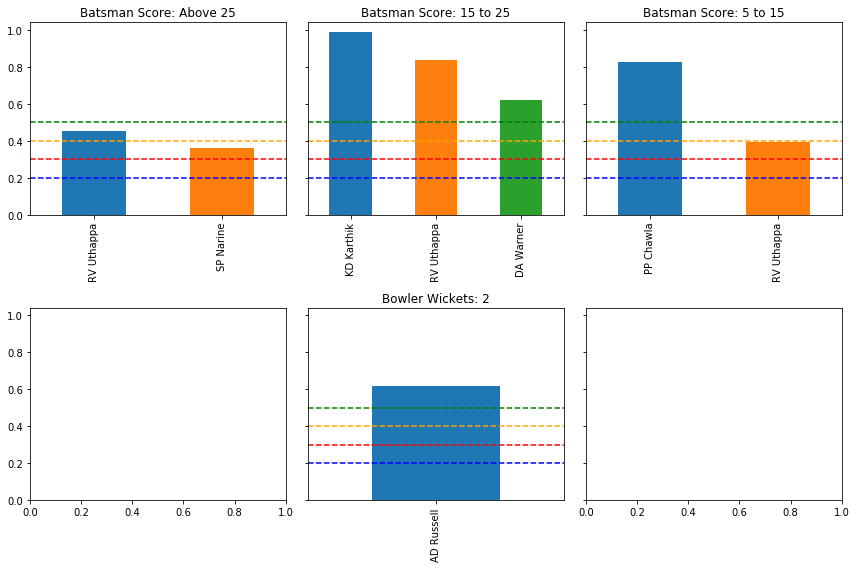

In [70]:
graph(bat_plot,bowl_plot,0.8,0.2)

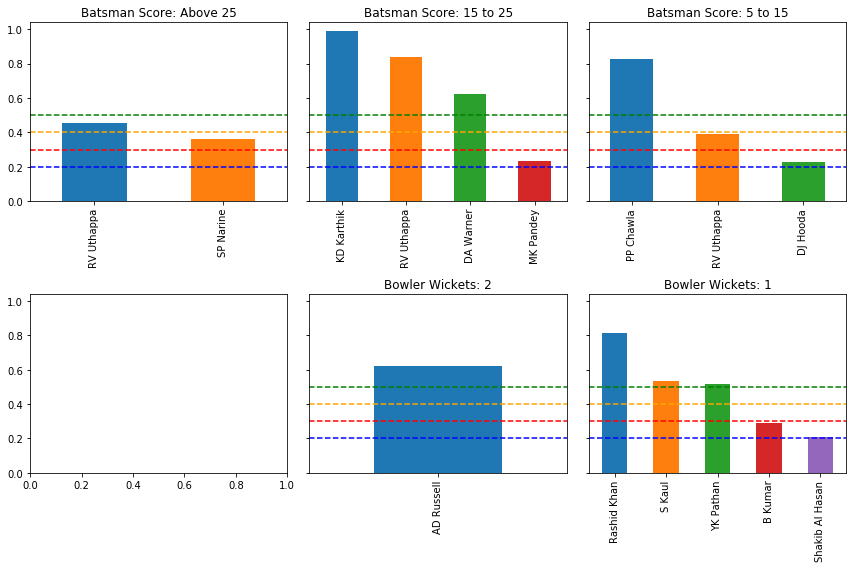

In [71]:
graph(bat_plot,bowl_plot,0.6,0.2)

In [72]:
bat_plot,bowl_plot = evalute(MI,DC,'MI','DC','Wankhede Stadium')

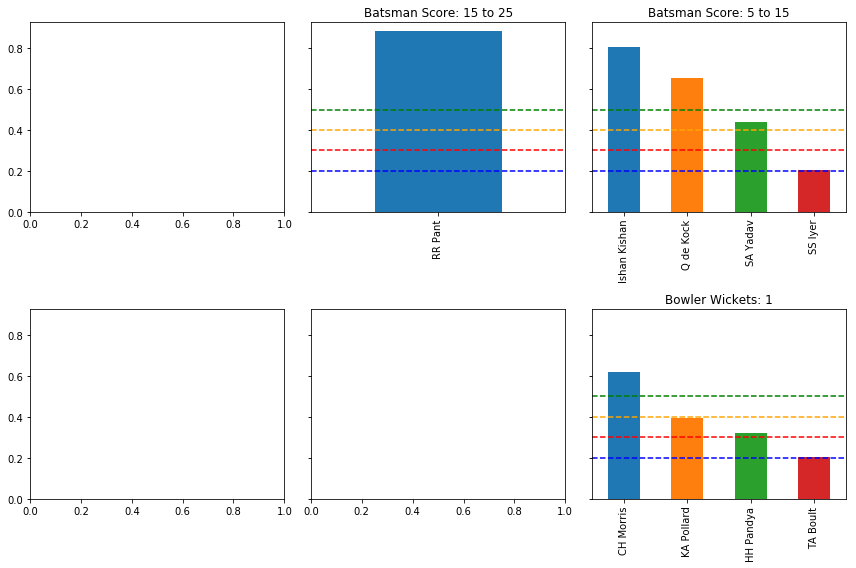

In [73]:
graph(bat_plot,bowl_plot,0.8,0.2)

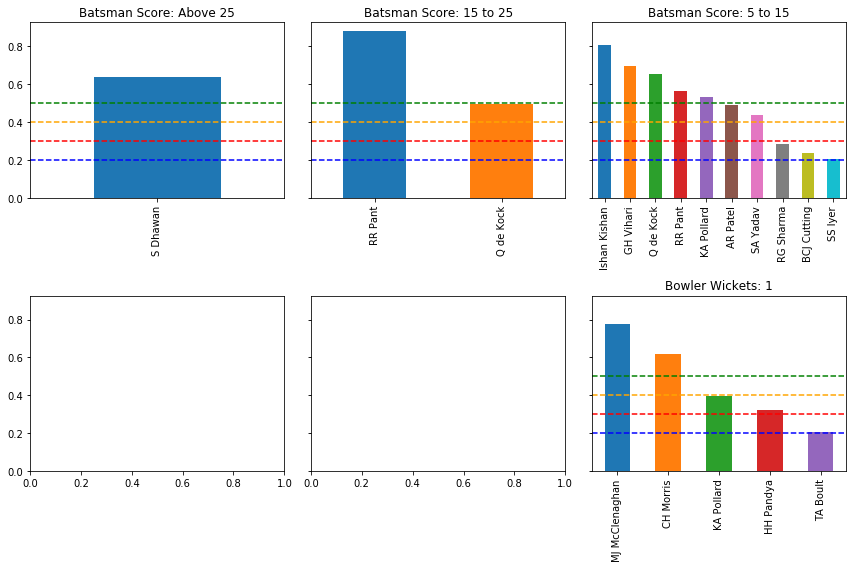

In [75]:
graph(bat_plot,bowl_plot,0.6,0.2)

In [80]:
batting_score[batting_score['batsman'].isin(MI) & (batting_score['venue']=='Wankhede Stadium') & (batting_score['bowler_team']=='DC')].groupby(by='batsman').sum()

,match_id,batsman_runs,out_bowler
batsman,,,
E Lewis,7902,23,1
HH Pandya,8560,62,1
Ishan Kishan,7902,18,0
KA Pollard,12427,113,1
KH Pandya,15869,17,1
M Markande,7902,5,0
MJ McClenaghan,601,3,0
RG Sharma,20249,64,7


In [81]:
batting_score[batting_score['batsman'].isin(DC) & (batting_score['venue']=='Wankhede Stadium') & (batting_score['bowler_team']=='MI')].groupby(by='batsman').sum()

,match_id,batsman_runs,out_bowler
batsman,,,
A Mishra,346,1,1
AR Patel,7993,31,0
CA Ingram,282,0,1
CH Morris,454,35,1
GH Vihari,985,15,2
HV Patel,484,6,1
K Rabada,24,27,1
RR Pant,7926,26,2
S Dhawan,9549,104,3
